In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import scipy.optimize as sp

In [2]:
#load data from .dat files
d200 = pd.read_csv("in/pomiar200mA.dat", sep="\s+").rename(columns={"t[s]":"t", 'U[mV]':'U'})
d400 = pd.read_csv("in/pomiar400mA.dat", sep="\s+").rename(columns={"t[s]":"t", 'U[mV]':'U'})

In [3]:
#global constants
_figsize = (11,8)
_dotsize = 10
_linewidth = 1
_dpi = 350

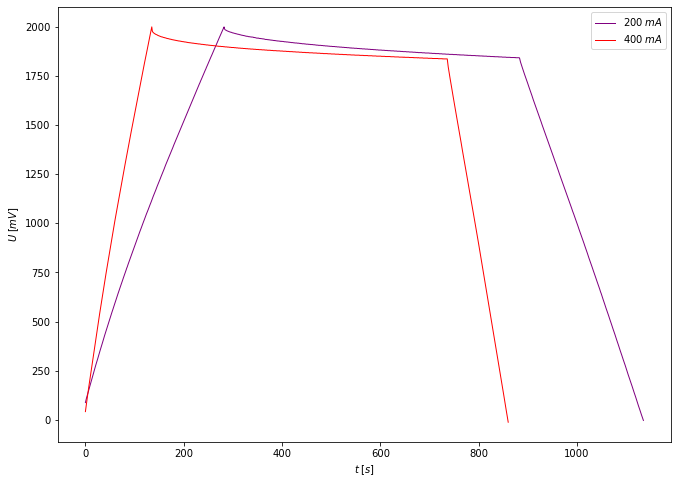

In [4]:

plt.figure(figsize=(11,8))

dotcolor = 'purple'
plt.plot(d200['t'], d200['U'], label=r'$200 \; mA$', color = dotcolor, linewidth = _linewidth)

dotcolor = 'red'
plt.plot(d400['t'], d400['U'], label=r'$400 \; mA$', color = dotcolor, linewidth = _linewidth)

plt.xlabel(r'$t \; [s]$')
plt.ylabel(r'$U \; [mV]$')

plt.legend()
plt.savefig('out/charakterystyka_200_i_400.jpg', dpi=_dpi)
plt.show()

fit_200 =  [1.54371176e+02 2.95782388e-03 1.81981726e+03]
fit_400 =  [1.28081048e+02 3.87680099e-03 1.82883463e+03]


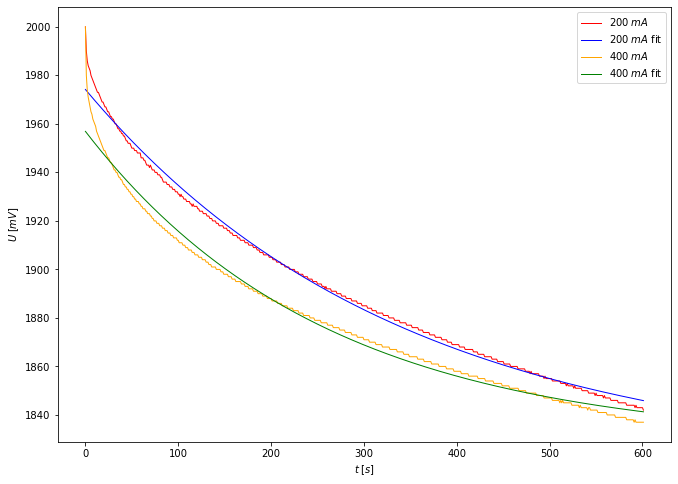

In [9]:

d200_short = d200[282:-252].copy()
d400_short = d400[135:-124].copy()

d200_short['t'] -= d200_short['t'].min()
d400_short['t'] -= d400_short['t'].min()

#declare function to which we will be fitting our data 
def exp_for_fit(x, a, b, c):
    return a*np.exp(-b * x) + c

plt.figure(figsize=(11,8))

#plot 200 data
dotcolor = 'red'
plt.plot(d200_short['t'], d200_short['U'], label=r'$200 \; mA$', color = dotcolor, linewidth=_linewidth)


#fit data
fit_200, cov = sp.curve_fit(exp_for_fit,d200_short['t'],d200_short['U'], p0=[200,0,2000], maxfev=100000)
print('fit_200 = ', fit_200)
d200_short['U_fit'] = exp_for_fit(d200_short['t'], fit_200[0], fit_200[1], fit_200[2])

dotcolor = 'blue'
plt.plot(d200_short['t'], d200_short['U_fit'], label=r'$200 \; mA$ fit', color = dotcolor, linewidth=_linewidth)


#plot 400 data
dotcolor = 'orange'
plt.plot(d400_short['t'], d400_short['U'], label=r'$400 \; mA$', color = dotcolor, linewidth=_linewidth)

#fit data
fit_400, cov = sp.curve_fit(exp_for_fit,d400_short['t'],d400_short['U'], p0=[200,0,2000], maxfev=100000)
print('fit_400 = ', fit_400)
d400_short['U_fit'] = exp_for_fit(d400_short['t'], fit_400[0], fit_400[1], fit_400[2])

dotcolor = 'green'
plt.plot(d400_short['t'], d400_short['U_fit'], label=r'$400 \; mA$ fit', color = dotcolor, linewidth=_linewidth)

plt.xlabel(r'$t \; [s]$')
plt.ylabel(r'$U \; [mV]$')

plt.legend()
plt.savefig('out/exp_200_i_400.jpg', dpi=_dpi)
plt.show()